## 3-8-1

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

import seaborn as sns

In [2]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def mplot(img1, img2=None, img3=None, img4=None, img5=None):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    
    imgs[0] = imgs[0].astype(np.uint8)
    
    if len(imgs) == 1:
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    else:
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)


In [4]:
def bulk_img( img, bulk_h, bulk_w):

    h, w =  img.shape

    dst = np.concatenate([img, np.zeros((bulk_h, w ))])
    dst = np.concatenate([dst, np.zeros((h+bulk_h, bulk_w ))], axis = 1)

    return (dst)


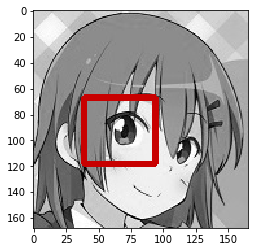

In [5]:

def main():
    img = cv2.imread("sample/3-8/input.png")
    
    
    temp = cv2.imread("sample/3-8/temp.png")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    pt = min_pt
    
    cv2.rectangle(img, (pt[0], pt[1]) , (pt[0] + w, pt[1] + h ), (0, 0, 200), 3)
    mplot(img)
#     mplot(temp)

main()

In [6]:
ls sample/3-8/

input.png   result.jpg    sample812.py  sample814.py  sample83.py  test.png
output.png  sample811.py  sample813.py  sample82.py   temp.png


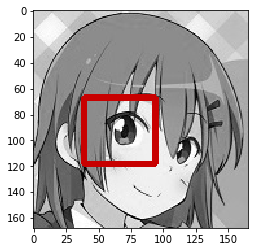

In [7]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
    
    # 
    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_CCOEFF_NORMED)
    
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    
    pt = max_pt
    
    cv2.rectangle(img, (pt[0], pt[1]),  (pt[0] + w, pt[1] +h), (0, 0, 200), 3)
    mplot(img)
    
    
main()

## Numpy 版

In [8]:
%pdb off
import pixiedust

Automatic pdb calling has been turned OFF
Pixiedust database opened successfully


...matching__  dx: 0 dy: 0


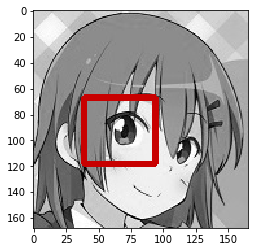

In [9]:
import cv2
import numpy as np

score = None
def template_matching_ssd(src, temp):

    global score
    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h-ht):
        for dx in range(0, w-wt):
            diff = (src[dy:dy+ht, dx:dx+wt] - temp)**2

            score[dy, dx] = diff.sum()

            pt = np.unravel_index(score.argmin(), score.shape)
            
            
            if dy % 300 == 0 and dx % 500 ==0: print("...matching__ ","dx:",dx,"dy:", dy)

    return (pt[1], pt[0], score)


def main():

    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape

    pt = template_matching_ssd(gray, temp)

    cv2.rectangle(img, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
    mplot(img)


main()

...matching__  dx: 0 dy: 0


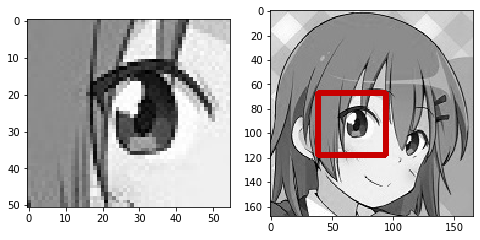

In [10]:
# %%pixie_debugger
import cv2
import numpy as np


def template_matching_zncc(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    global score
    score = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")

    # テンプレート
    mu_t = np.mean(temp)

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]

            mu_r = np.mean(roi)

            roi = roi - mu_r

            tmp_temp = temp - mu_t

            num = np.sum(roi * tmp_temp)
            
            den = np.sqrt(np.sum(roi**2)) * np.sqrt(np.sum(tmp_temp**2))
            
            if den == 0:
                score[dy, dx] = 0
            else:
                score[dy, dx] = num / den
            
            
    pt = np.unravel_index(score.argmax(), score.shape)
    
    return (pt[1], pt[0], score)


def main() :
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    # テンプレートの画像の高さ・幅
    h, w = temp.shape
    
    pt = template_matching_ssd(gray, temp)
    
#     cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    
    mplot(temp, img)

main()

In [11]:
lv(score)


interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

## ヒートマップ

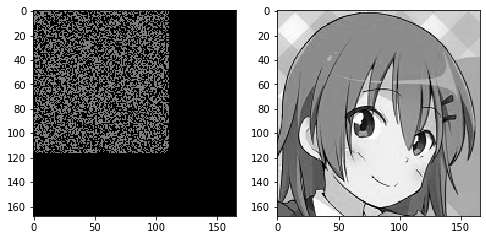

In [12]:
img = cv2.imread("sample/3-8/input.png")
temp = cv2.imread("sample/3-8/temp.png")
# score_256 = (score+1)*128

score_256 =  ((score+1)*128).astype(np.int)
score_256 = bulk_img(score_256, temp.shape[0], temp.shape[1] )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# gray_score = cv2.cvtColor(score_256, cv2.COLOR_RGB2GRAY)

mplot(score_256, img)


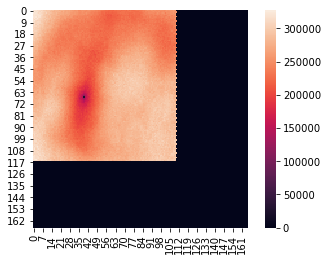

In [13]:
score = bulk_img( score, temp.shape[0], temp.shape[1])
sns.heatmap(score, square = True)

In [14]:
lv(score)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

## しましまの例

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


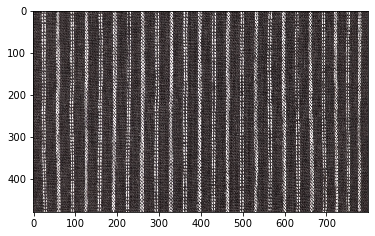

In [15]:
## デバッグ用画像簡易入手
import urllib.request ;import cv2; import matplotlib.pyplot as plt
# https://tex-mall.jp/file/item/5a4356082008d/88f661d68f080129fb0e514b8834198f.jpg' # ここを好きに変える
shima_url = "https://kr-aki.co.jp/upload/save_image/s-ym196_garaup.jpg"
img_shima_org = cv2.imdecode(np.fromstring(urllib.request.urlopen(shima_url).read(), np.uint8), cv2.IMREAD_COLOR)
img_shima = img_shima_org.copy()

plt.imshow(img_shima)



...matching__  dx: 0 dy: 0
...matching__  dx: 500 dy: 0
...matching__  dx: 0 dy: 300
...matching__  dx: 500 dy: 300


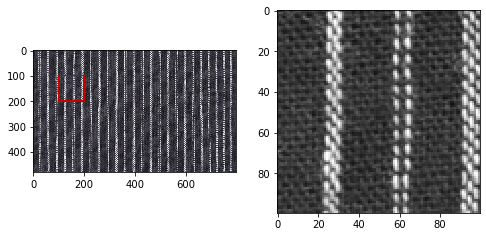

In [16]:
gray_shima = cv2.cvtColor(img_shima, cv2.COLOR_RGB2GRAY)
temp_shima = gray_shima[100:200,100:200].copy()
# breakpoint()
h, w = temp_shima.shape
pt_shima = template_matching_ssd(gray_shima, temp_shima)

score_shima = pt_shima[2]
score_shima = bulk_img(score_shima, h, w)

cv2.rectangle(img_shima, (pt_shima[0], pt_shima[1]), (pt_shima[0] + w, pt_shima[1] + h), (0, 0, 200), 3)
mplot(img_shima, temp_shima)

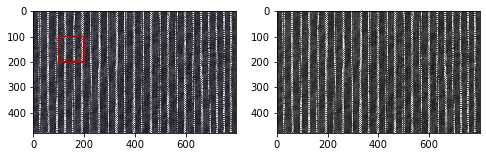

In [17]:
mplot(img_shima, gray_shima)

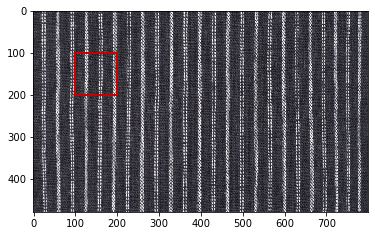

In [18]:
mplot(img_shima)

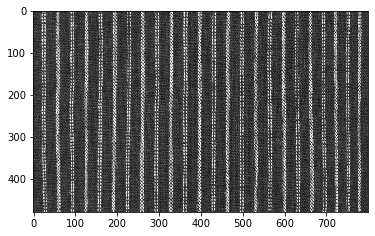

In [19]:
mplot(gray_shima)

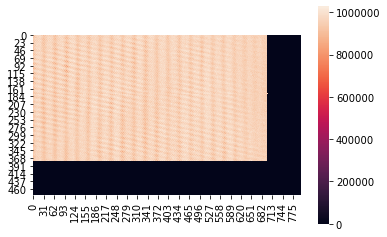

In [20]:
sns.heatmap(score_shima, square=True)


In [42]:
lv(score_shima)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


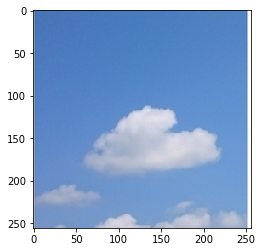

In [21]:
sky_url = "https://static.minne.com/profiles/2686518/large/589b58b41036956c04da78a4b06fce4c6173db7d.jpg"
img_sky = cv2.imdecode(np.fromstring(urllib.request.urlopen(sky_url).read(), np.uint8), cv2.IMREAD_COLOR)
mplot(img_sky)

...matching__  dx: 0 dy: 0


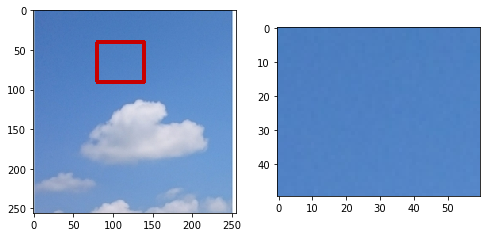

In [23]:
gray_sky = cv2.cvtColor(img_sky, cv2.COLOR_RGB2GRAY)
temp_sky_org = img_sky[40:90,80:140].copy()

temp_sky = cv2.cvtColor(temp_sky_org, cv2.COLOR_RGB2GRAY)
# temp_sky = gray_sky[40:90,80:140]
# breakpoint()
h, w = temp_sky.shape
pt_sky = template_matching_ssd(gray_sky, temp_sky)

score_sky = pt_sky[2]
score_sky = bulk_img(score_sky, h, w)

cv2.rectangle(img_sky, (pt_sky[0], pt_sky[1]), (pt_sky[0] + w, pt_sky[1] + h), (0, 0, 200), 3)
mplot(img_sky, temp_sky_org)

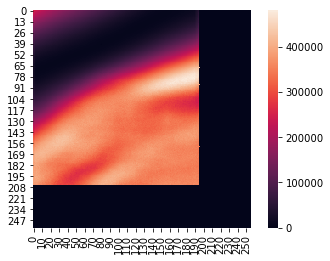

In [24]:
# %matplotlib inline
# plt.figure()
sns.heatmap(score_sky, square=True)

In [25]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# ax2.axis("off")
# ax2.imshow(img_sky)


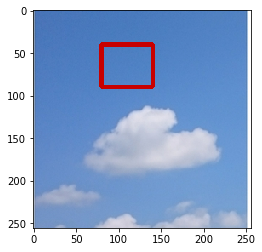

In [26]:
mplot(img_sky)

In [27]:
lv(score_sky)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

## 明るさを変えたもののマッチング

##### SSDでのマッチングだと、、、

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


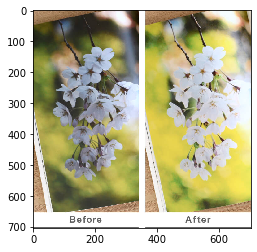

In [28]:
skr_url = "https://1.bp.blogspot.com/-g1gpbp4iAfc/WPhnwG3eHDI/AAAAAAAACFU/DfDPFn7GWrwuPm_u9xM4kah9M4h-zoOiQCPcB/s1600/img19.jpg"

img_skr = cv2.imdecode(np.fromstring(urllib.request.urlopen(skr_url).read(), np.uint8), cv2.IMREAD_COLOR)
mplot(img_skr)


...matching__  dx: 0 dy: 0
...matching__  dx: 0 dy: 300


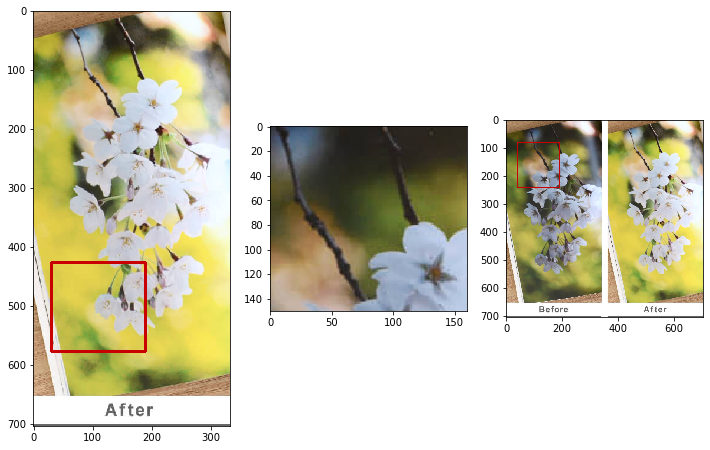

In [29]:
temp_skr_org = img_skr[40:190,80:240].copy()

img_skr_with_temp = img_skr.copy()
cv2.rectangle(img_skr_with_temp, (40, 80), (190, 240), (0, 0, 200), 3)

img_skr_brt = img_skr.copy()[:, 370:]

gray_skr = cv2.cvtColor(img_skr_brt, cv2.COLOR_RGB2GRAY)

temp_skr = cv2.cvtColor(temp_skr_org, cv2.COLOR_RGB2GRAY)

h, w = temp_skr.shape
pt_skr = template_matching_ssd(gray_skr, temp_skr)

score_skr = pt_skr[2]
score_skr = bulk_img(score_skr, h, w)

cv2.rectangle(img_skr_brt, (pt_skr[0], pt_skr[1]), (pt_skr[0] + w, pt_skr[1] + h), (0, 0, 200), 3)
mplot(img_skr_brt, temp_skr_org, img_skr_with_temp)

##### 誤検出。左：検出結果　中：テンプレ　右：テンプレの正解

In [30]:
lv(score_skr)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

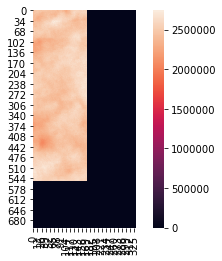

In [31]:
sns.heatmap(score_skr, square=True)

確かにヒートマップで違う部分が濃い

##### 続いてZNCCだと、正しく検出された

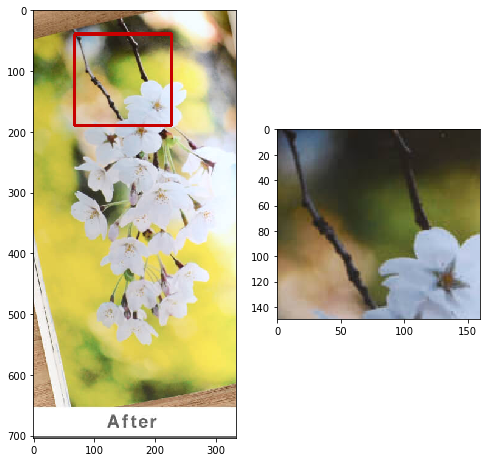

In [32]:
temp_skrz_org = img_skr[40:190,80:240].copy()
img_skrz_brt = img_skr.copy()[:, 370:]

gray_skrz = cv2.cvtColor(img_skrz_brt, cv2.COLOR_RGB2GRAY)

temp_skrz = cv2.cvtColor(temp_skrz_org, cv2.COLOR_RGB2GRAY)

h, w = temp_skrz.shape
pt_skrz = template_matching_zncc(gray_skrz, temp_skrz)

score_skrz = pt_skrz[2]
score_skrz = bulk_img(score_skrz, h, w)

cv2.rectangle( img_skrz_brt, (pt_skrz[0], pt_skrz[1]), (pt_skrz[0] + w, pt_skrz[1] + h), (0, 0, 200), 3)
mplot(img_skrz_brt, temp_skrz_org)

In [33]:
lv(score_skrz)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

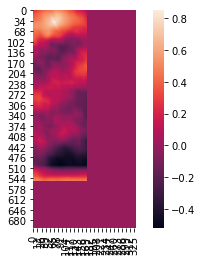

In [34]:
sns.heatmap(score_skrz, square=True)

## おまけ

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


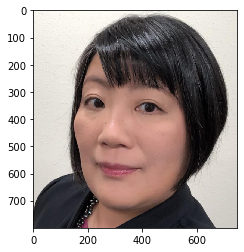

In [35]:
mr_url = "https://researchmap.jp/read0140800/cover_picture.JPG"
img_mr_org = cv2.imdecode(np.fromstring(urllib.request.urlopen(mr_url).read(), np.uint8), cv2.IMREAD_COLOR)[500:1300, 250:1000]
img_mr = img_mr_org.copy()
mplot(img_mr)



...matching__  dx: 0 dy: 0
...matching__  dx: 500 dy: 0
...matching__  dx: 0 dy: 300
...matching__  dx: 500 dy: 300
...matching__  dx: 0 dy: 600
...matching__  dx: 500 dy: 600


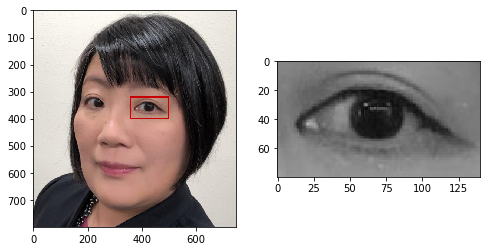

In [36]:
gray_mr = cv2.cvtColor(img_mr, cv2.COLOR_RGB2GRAY)
temp_mr = gray_mr[320:400,360:500]
# breakpoint()
h, w = temp_mr.shape

# plt.imshow(temp_mr)
pt = template_matching_ssd(gray_mr, temp_mr)

score_mr = pt[2]
score_mr = bulk_img(score_mr, h, w)

cv2.rectangle(img_mr, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
mplot(img_mr, temp_mr)

In [37]:
lv(score_mr)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…

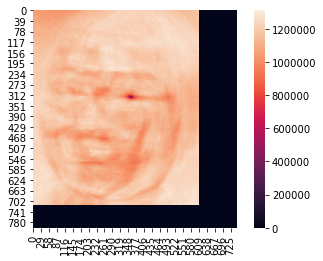

In [38]:
sns.heatmap(score_mr, square=True)

...matching__  dx: 0 dy: 0
...matching__  dx: 500 dy: 0
...matching__  dx: 0 dy: 300
...matching__  dx: 500 dy: 300
...matching__  dx: 0 dy: 600
...matching__  dx: 500 dy: 600


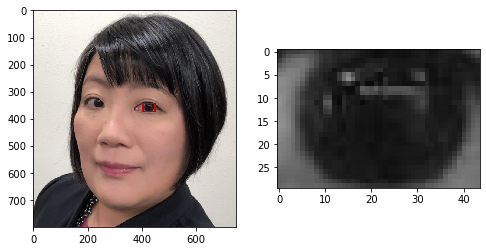

In [39]:
img_mr2 = img_mr_org.copy()
gray_mr2 = cv2.cvtColor(img_mr, cv2.COLOR_RGB2GRAY).copy()
temp_mr2 = gray_mr[344:374,406:450]
# breakpoint()
h, w = temp_mr2.shape
pt = template_matching_ssd(gray_mr2, temp_mr2)

score_mr2 = pt[2]
score_mr2 = bulk_img(score_mr2, h, w)

cv2.rectangle(img_mr2, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
mplot(img_mr2, temp_mr2)

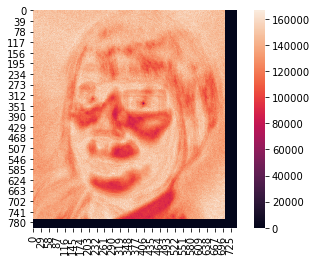

In [40]:
sns.heatmap(score_mr2, square=True)

In [41]:
lv(score_mr, score_mr2)

interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…